P ≈ 0.322  |  Theoretical Smax ≈ 1.37


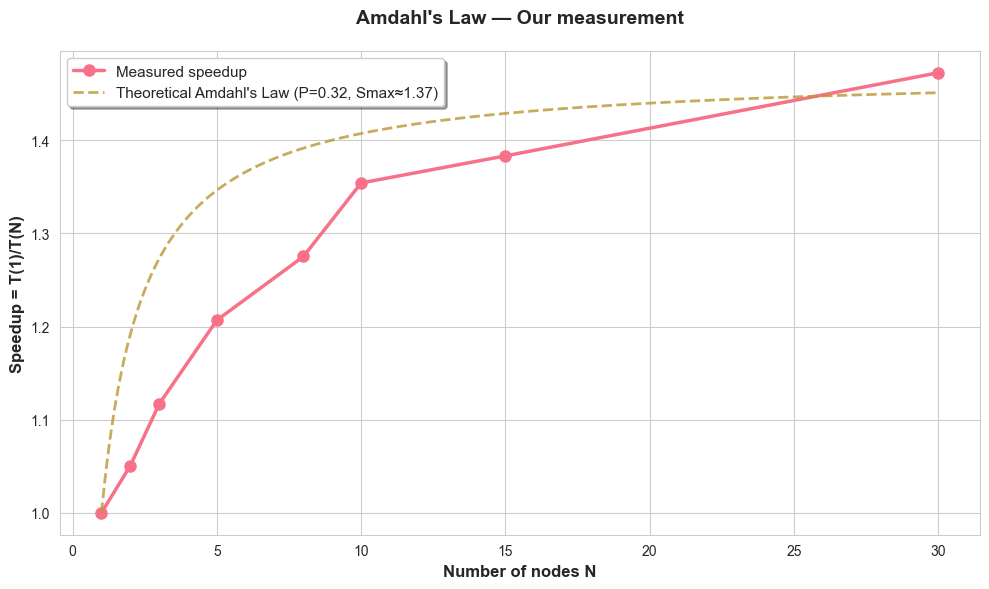

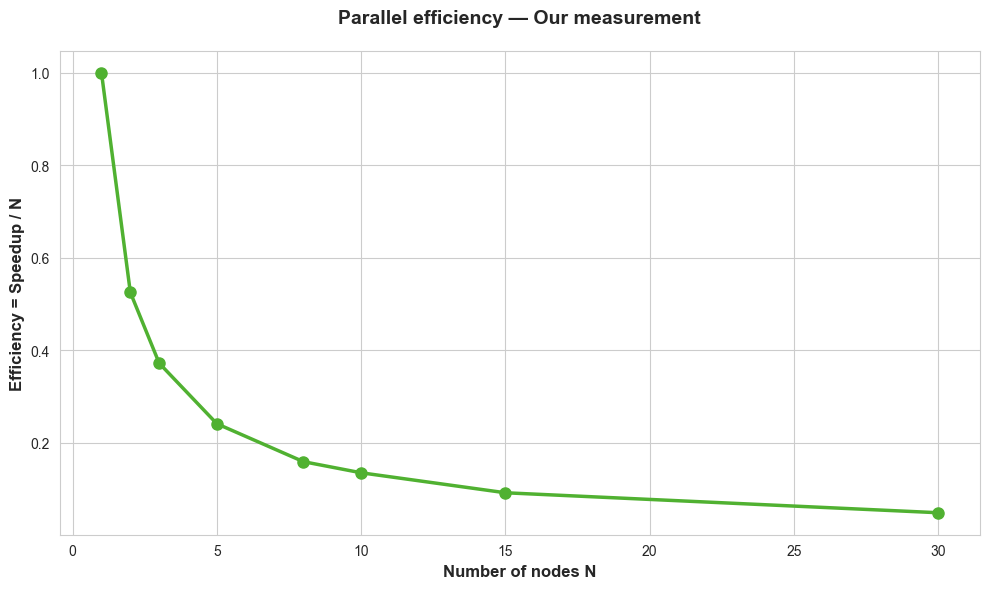

     phase  n_nodes    t_map  t_shuffle  t_reduce  t_total   speedup  \
0  phase1b        1  444.755    183.530   116.574  769.799  1.000000   
1  phase1b        2  466.745    145.952    95.122  732.756  1.050553   
2  phase1b        3  464.568    122.218    78.237  689.241  1.116879   
3  phase1b        5  441.978    104.928    66.128  637.888  1.206793   
4  phase1b        8  441.529     83.343    55.836  603.647  1.275247   
5  phase1b       10  435.508     68.822    41.989  568.465  1.354171   
6  phase1b       15  438.315     63.772    31.078  556.514  1.383252   
7  phase1b       30  432.654     51.534    17.505  522.778  1.472516   

   efficiency  
0    1.000000  
1    0.525276  
2    0.372293  
3    0.241359  
4    0.159406  
5    0.135417  
6    0.092217  
7    0.049084  


In [1]:
import seaborn as sns
import pandas as pd, numpy as np, matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("husl")

# Data and DataFrame
data = {"phase": ["phase1b"]*8, "n_nodes": [1,2,3,5,8,10,15,30],
    "t_map": [444.755,466.745,464.568,441.978,441.529,435.508,438.315,432.654],
    "t_shuffle": [183.530,145.952,122.218,104.928,83.343,68.822,63.772,51.534],
    "t_reduce": [116.574,95.122,78.237,66.128,55.836,41.989,31.078,17.505],
    "t_total": [769.799,732.756,689.241,637.888,603.647,568.465,556.514,522.778]}
df = pd.DataFrame(data)

# Speedup, efficiency, and Amdahl's law parameters
T1 = df.loc[df['n_nodes']==1, 't_total'].iloc[0]
df['speedup'] = T1 / df['t_total']
df['efficiency'] = df['speedup'] / df['n_nodes']
slope, intercept = np.polyfit(1.0/df['n_nodes'], 1.0/df['speedup'], 1)
P = float(np.clip(slope, 0, 1))
Smax = 1.0 / max(1e-12, intercept)
print(f"P ≈ {P:.3f}  |  Theoretical Smax ≈ {Smax:.2f}")

# Theoretical curve and plots
N = np.linspace(1, 30, 300)
S_theo = 1.0 / ((1.0 - P) + P / N)

plt.figure(figsize=(10,6))
plt.plot(df['n_nodes'], df['speedup'], 'o-', markersize=8, linewidth=2.5, label='Measured speedup')
plt.plot(N, S_theo, '--', linewidth=2, alpha=0.8, label=f"Theoretical Amdahl's Law (P={P:.2f}, Smax≈{Smax:.2f})")
plt.xlabel("Number of nodes N", fontsize=12, fontweight='bold')
plt.ylabel("Speedup = T(1)/T(N)", fontsize=12, fontweight='bold')
plt.title("Amdahl's Law — Our measurement", fontsize=14, fontweight='bold', pad=20)
plt.legend(fontsize=11, frameon=True, fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(df['n_nodes'], df['efficiency'], 'o-', markersize=8, linewidth=2.5, color=sns.color_palette()[2])
plt.xlabel("Number of nodes N", fontsize=12, fontweight='bold')
plt.ylabel("Efficiency = Speedup / N", fontsize=12, fontweight='bold')
plt.title("Parallel efficiency — Our measurement", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print(df)